In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [5]:
df = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [6]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [7]:
df.info

<bound method DataFrame.info of      Ticket #                                 Customer Complaint      Date  \
0      250635                      Comcast Cable Internet Speeds  22-04-15   
1      223441       Payment disappear - service got disconnected  04-08-15   
2      242732                                  Speed and Service  18-04-15   
3      277946  Comcast Imposed a New Usage Cap of 300GB that ...  05-07-15   
4      307175         Comcast not working and no service to boot  26-05-15   
...       ...                                                ...       ...   
2219   213550                               Service Availability  04-02-15   
2220   318775         Comcast Monthly Billing for Returned Modem  06-02-15   
2221   331188                            complaint about comcast  06-09-15   
2222   360489             Extremely unsatisfied Comcast customer  23-06-15   
2223   363614               Comcast, Ypsilanti MI Internet Speed  24-06-15   

     Date_month_year         Ti

In [9]:
df.isnull()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2219,False,False,False,False,False,False,False,False,False,False,False
2220,False,False,False,False,False,False,False,False,False,False,False
2221,False,False,False,False,False,False,False,False,False,False,False
2222,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

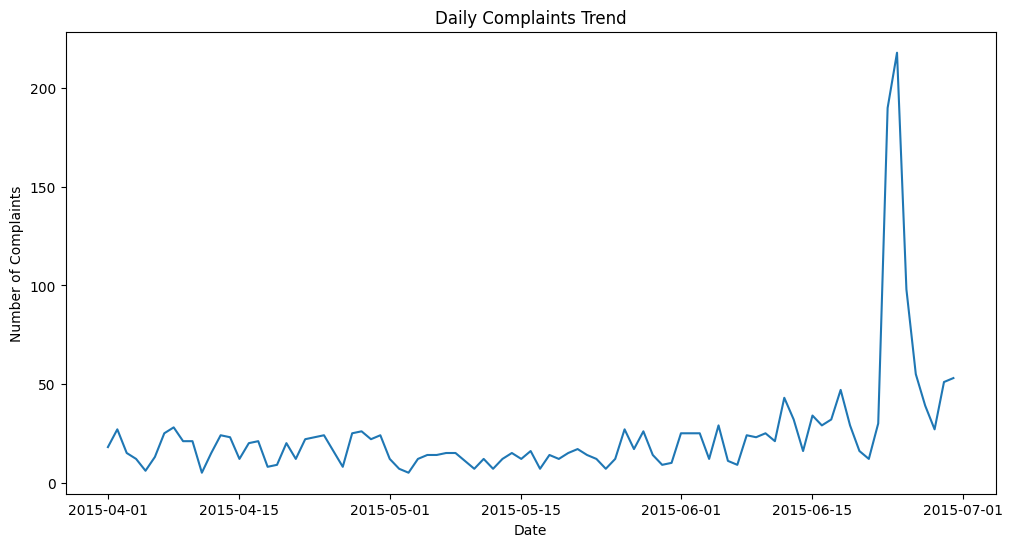

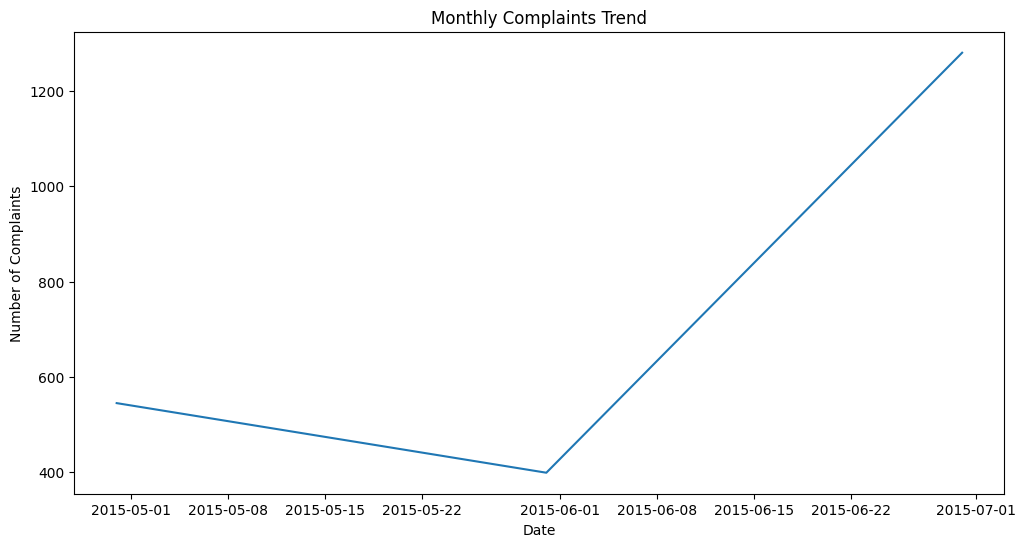

In [12]:
# Convert the 'Date' column to a datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Create a new DataFrame with daily complaint counts
daily_complaints = df.groupby(['Date']).size().reset_index(name='Daily Complaints')

# Create a line chart for daily complaint counts
plt.figure(figsize=(12,6))
plt.plot(daily_complaints['Date'], daily_complaints['Daily Complaints'])
plt.title('Daily Complaints Trend')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()

# Create a new DataFrame with monthly complaint counts
monthly_complaints = df.groupby(pd.Grouper(key='Date', freq='M')).size().reset_index(name='Monthly Complaints')

# Create a line chart for monthly complaint counts
plt.figure(figsize=(12,6))
plt.plot(monthly_complaints['Date'], monthly_complaints['Monthly Complaints'])
plt.title('Monthly Complaints Trend')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()


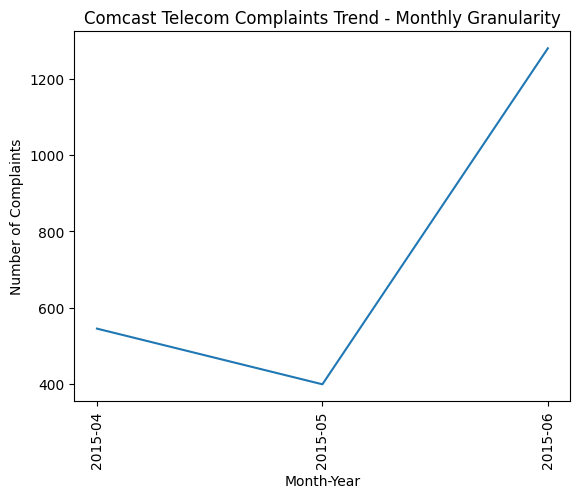

In [20]:
# Create a new column with month-year values
df['Month-Year'] = df['Date'].apply(lambda x: x.strftime('%Y-%m'))

# Group the data by Month-Year and count the number of complaints
monthly_complaints = df.groupby('Month-Year').size().reset_index(name='Number of Complaints')

# Create a line plot to show the trend over time
plt.plot(monthly_complaints['Month-Year'], monthly_complaints['Number of Complaints'])
plt.xticks(rotation=90)
plt.xlabel('Month-Year')
plt.ylabel('Number of Complaints')
plt.title('Comcast Telecom Complaints Trend - Monthly Granularity')
plt.show()


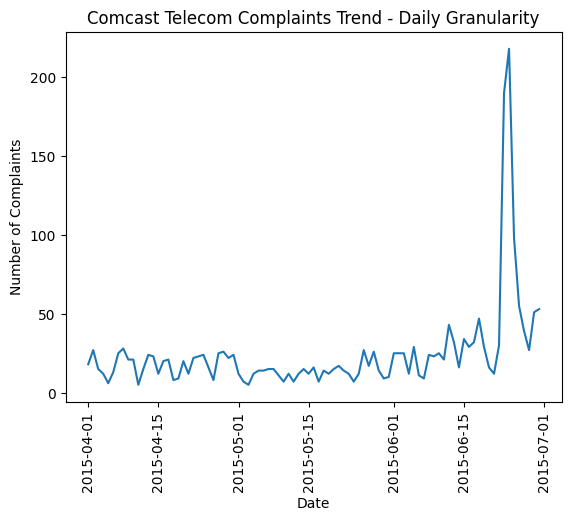

In [21]:
# Create a new column with date values
df['Date'] = pd.to_datetime(df['Date'].dt.date)

# Group the data by date and count the number of complaints
daily_complaints = df.groupby('Date').size().reset_index(name='Number of Complaints')

# Create a line plot to show the trend over time
plt.plot(daily_complaints['Date'], daily_complaints['Number of Complaints'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('Comcast Telecom Complaints Trend - Daily Granularity')
plt.show()

In [13]:
# Count the number of occurrences of each complaint type
complaint_counts = df['Customer Complaint'].value_counts()

# Print the table of complaint types and their frequencies
print(complaint_counts)

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64


# Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [18]:
# Create a new column to store the new variable
df["open_closed"] = ""

# Loop over each row and set the new variable
for i, row in df.iterrows():
    if row["Status"] in ["Open", "Pending"]:
        df.at[i, "open_closed"] = "Open"
    elif row["Status"] in ["Closed" , "Solved"]:
        df.at[i, "open_closed"] = "Closed"
    else:
        df.at[i, "open_closed"] = "Unknown" # Optional: assign an "Unknown" category if neither condition is met

# Print the updated DataFrame
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,open_closed
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed


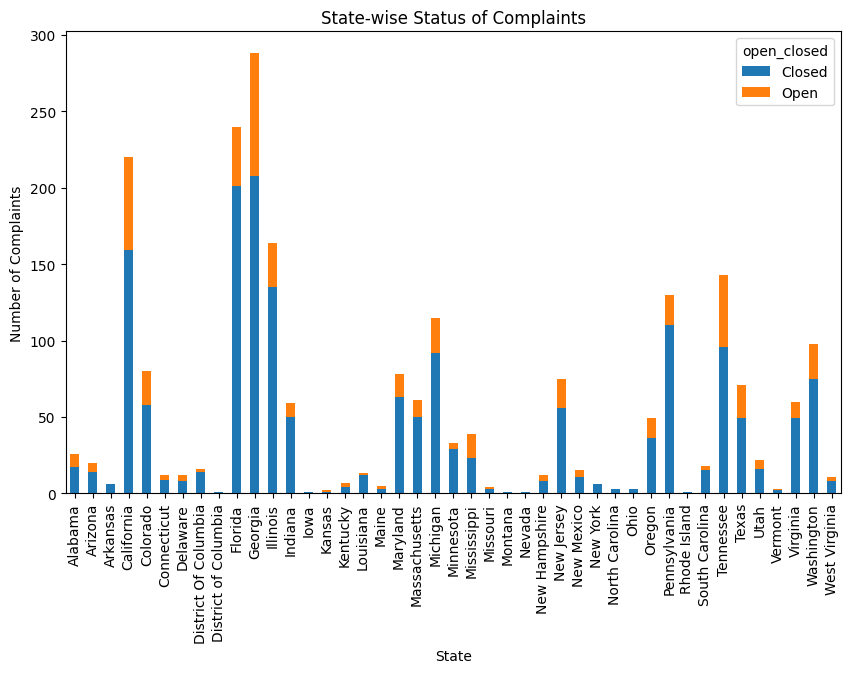

In [22]:
# Grouping the data by state and new status
grouped_data = df.groupby(['State', 'open_closed']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.title('State-wise Status of Complaints')

# Displaying the chart
plt.show()

In [23]:
# Grouping the data by state and new status
grouped_data = df.groupby(['State', 'open_closed']).size().unstack(fill_value=0)

# Calculating the percentage of unresolved complaints for each state
grouped_data['Percentage Unresolved'] = grouped_data['Open'] / (grouped_data['Open'] + grouped_data['Closed']) * 100

# Sorting the data by percentage unresolved in descending order
grouped_data_sorted = grouped_data.sort_values('Percentage Unresolved', ascending=False)

# Viewing the data
print(grouped_data_sorted)

open_closed           Closed  Open  Percentage Unresolved
State                                                    
Kansas                     1     1              50.000000
Kentucky                   4     3              42.857143
Mississippi               23    16              41.025641
Maine                      3     2              40.000000
Alabama                   17     9              34.615385
Vermont                    2     1              33.333333
Delaware                   8     4              33.333333
New Hampshire              8     4              33.333333
Tennessee                 96    47              32.867133
Texas                     49    22              30.985915
Arizona                   14     6              30.000000
Georgia                  208    80              27.777778
California               159    61              27.727273
Colorado                  58    22              27.500000
Utah                      16     6              27.272727
West Virginia 

In [24]:
# Filtering the data to only include complaints received through Internet and customer care calls
filtered_data = df[df['Received Via'].isin(['Internet', 'Customer Care Call'])]

# Grouping the filtered data by new status and calculating the percentage resolved
grouped_data = filtered_data.groupby(['open_closed']).size()
percentage_resolved = grouped_data['Closed'] / grouped_data.sum() * 100

# Viewing the percentage resolved
print("Percentage of complaints resolved till date, received through Internet and customer care calls:", round(percentage_resolved, 2), "%")

Percentage of complaints resolved till date, received through Internet and customer care calls: 76.75 %
